In [5]:
import networkx as nx
import pandas as pd
import numpy as np
import random

# Reading data & buliding the graph

In [7]:
nodes_df = pd.read_csv('graph_data/jalili_nodes.csv')
edges_df = pd.read_csv('graph_data/jalili_edges.csv')

G = nx.DiGraph()

# اضافه کردن نودها با ویژگی‌ها
for _, row in nodes_df.iterrows():
    G.add_node(row['Id'],
               Label=row['Label'],
               views=row['views'],
               followers=row['followers'],
               importance=row['importance'],
               posts=row['posts'],
               modularity_class=row['modularity_class'],
               indegree=row['indegree'],
               outdegree=row['outdegree'],
               Degree=row['Degree'],
               closeness_centrality=row['closnesscentrality'],
               betweenness_centrality=row['betweenesscentrality'])

# اضافه کردن یال‌ها با وزن
for _, row in edges_df.iterrows():
    G.add_edge(row['Source'], row['Target'], weight=row['Weight'], candidate=row['Candidate'])


In [8]:
nodes_df

,Id,Label,views,followers,importance,posts,indegree,outdegree,Degree,closnesscentrality,betweenesscentrality,modularity_class
0,1025087215,volleyballpress,11237,4389,1.417582,17,0,1,1,0.184932,0.000000,45
1,1447659114,gazersesi,3049,1160,1.268100,37,0,2,2,0.666667,0.000000,37
2,1543593190,makos_herat,2979,6272,1.145952,7,0,1,1,0.176601,0.000000,168
3,1826268931,sedalihasani,89823,6051,2.333737,47,3,0,3,0.000000,0.000000,0
4,1124128736,alisaraye_fouman,0,114,1.025306,6,0,1,1,1.000000,0.000000,139
...,...,...,...,...,...,...,...,...,...,...,...,...
8621,1055964609,jokandannews,19189,5106,1.683858,41,4,3,7,0.193103,13035.964877,37
8622,1002276548,ale_yaasin,17612,3041,2.009541,148,0,5,5,0.218336,0.000000,139
8623,1264367454,darhamnewsiran,201,61,1.327344,107,0,14,14,0.247943,0.000000,189
8624,1407302874,rahmaatism,218422,14313,4.037705,415,26,11,37,0.255401,25321.984347,139


# Centrality findnig functions

In [10]:
def find_by_label(label, G):
    for node, attrs in G.nodes(data=True):
        if attrs.get('Label') == label:
            return node
    return None

def find_by_modularity_class(modularity_class, G):
    community = []
    for node, attrs in G.nodes(data=True):
        if attrs.get('modularity_class') == modularity_class:
            community.append(node)
    return community


def find_top_high_measure(G, number, measure):
    sorted_nodes = sorted(G.nodes(data=True), key=lambda x: x[1][measure], reverse=True)
    return [node for node,  _ in sorted_nodes[:number]]

def find_top_high_measure_list(node_list, G, number, measure):
    sorted_nodes = sorted(node_list, key=lambda node_id: G.nodes[node_id].get(measure, 0), reverse=True)
    return sorted_nodes[:number]


def find_refference_nodes(G, indegree_limit):
    refference_nodes = [node for node, attrs in G.nodes(data=True) if attrs['indegree'] > indegree_limit]
    return refference_nodes

def find_top_bridges(G, bridge_nodes):
    sorted_nodes = sorted(bridge_nodes, key=lambda node_id: G.nodes[node_id].get('indegree', 0), reverse=True)
    return sorted_nodes

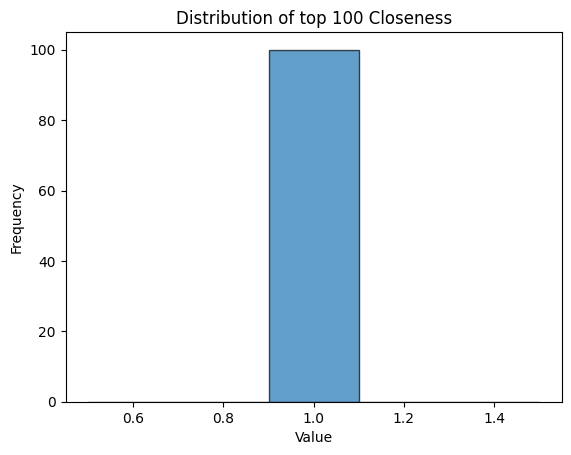

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [82]:
sorted_nodes = sorted(G.nodes(data=True), key=lambda x: x[1]['closeness_centrality'], reverse=True)
data = [data['closeness_centrality'] for node,data in sorted_nodes[:100]]

counts, bins = np.histogram(data, bins='auto')

plt.hist(data, bins=5, edgecolor='black', alpha=0.7)

plt.title('Distribution of top 100 Closeness')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.show()
print(data)

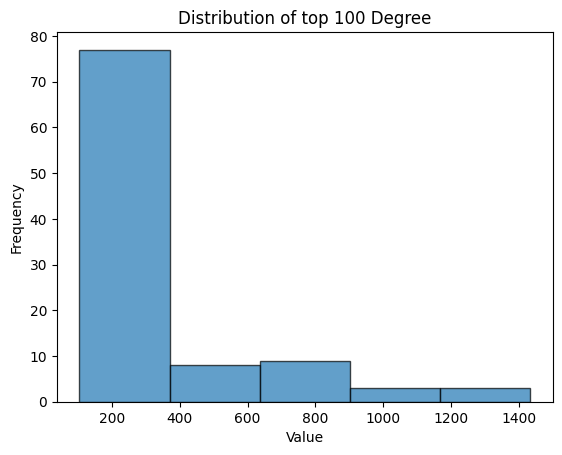

[1434, 1293, 1179, 1133, 986, 932, 870, 812, 761, 743, 731, 729, 707, 696, 657, 617, 583, 563, 555, 412, 396, 374, 371, 368, 355, 340, 340, 321, 320, 317, 308, 283, 256, 251, 250, 247, 247, 243, 236, 227, 225, 224, 216, 213, 211, 206, 206, 205, 204, 198, 193, 189, 186, 185, 184, 179, 172, 166, 158, 156, 154, 154, 154, 152, 145, 144, 142, 140, 139, 136, 132, 128, 127, 127, 125, 125, 124, 123, 120, 120, 119, 119, 118, 114, 113, 111, 111, 111, 111, 110, 110, 109, 107, 107, 105, 105, 104, 104, 104, 104]


In [86]:
sorted_nodes = sorted(G.nodes(data=True), key=lambda x: x[1]['Degree'], reverse=True)
data = [data['Degree'] for node,data in sorted_nodes[:100]]

counts, bins = np.histogram(data, bins='auto')

plt.hist(data, bins=5, edgecolor='black', alpha=0.7)

plt.title('Distribution of top 100 Degree')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.show()
print(data)

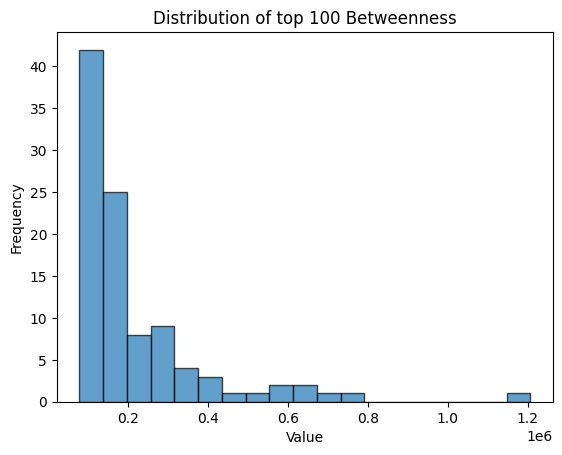

[1207117, 740521, 727140, 655265, 645405, 609339, 557287, 517924, 474058, 406186, 392702, 380459, 372085, 350682, 349644, 340557, 311612, 309300, 309021, 298345, 294708, 285416, 278755, 275680, 255917, 246486, 242346, 238285, 237654, 235111, 231279, 220562, 207140, 196017, 192719, 189581, 185078, 184059, 183445, 178815, 176829, 176116, 174280, 170623, 160429, 158420, 157284, 154974, 153379, 151949, 151299, 149632, 145894, 144996, 144265, 143594, 141528, 139807, 136017, 130758, 129992, 126776, 125102, 123471, 123314, 122679, 121992, 120988, 120444, 119554, 119095, 118534, 113522, 111658, 111384, 106634, 105860, 103314, 102246, 102087, 98532, 96468, 94927, 93519, 91813, 91095, 90158, 88030, 83244, 82531, 81919, 81543, 81132, 80705, 80453, 80244, 78817, 78049, 77641, 77520]


In [84]:
sorted_nodes = sorted(G.nodes(data=True), key=lambda x: x[1]['betweenness_centrality'], reverse=True)
data = [round(data['betweenness_centrality']) for node,data in sorted_nodes[:100]]

counts, bins = np.histogram(data, bins='auto')

plt.hist(data, bins='auto', edgecolor='black', alpha=0.7)

plt.title('Distribution of top 100 Betweenness')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.show()
print(data)

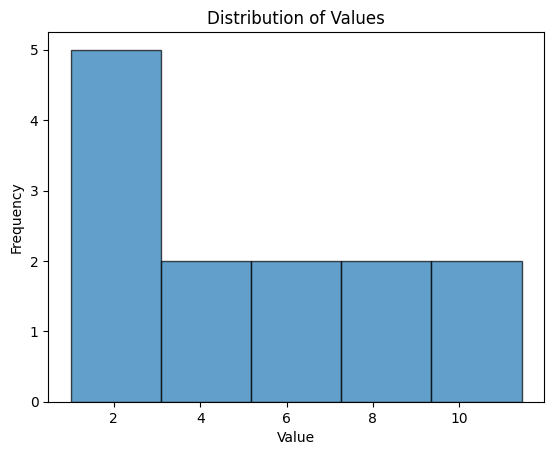

In [73]:

import matplotlib.pyplot as plt

# لیست مرتب شما
data = [1, 2, 2, 3, 3, 4, 5, 6, 7, 8, 9, 10]

# محاسبه هیستوگرام
counts, bins = np.histogram(data, bins='auto')

# رسم هیستوگرام
plt.hist(data, bins='auto', edgecolor='black', alpha=0.7)

# افزودن عنوان و برچسب‌ها
plt.title('Distribution of Values')
plt.xlabel('Value')
plt.ylabel('Frequency')

# نمایش نمودار
plt.show()

# Graph drawing

In [20]:
import networkx as nx
import matplotlib.pyplot as plt

def draw_multiple_graphs(inputs, iteration, layout_func=nx.spring_layout):
    num_graphs = len(inputs)
    plt.figure(figsize=(5 * num_graphs, 5)) 

    for i, input in enumerate(inputs):
        G, visited_nodes = input
        pos = nx.random_layout(G)

        plt.subplot(1, num_graphs, i + 1)

        active_nodes = [node for node in G.nodes() if node in visited_nodes]
        inactive_nodes = [node for node in G.nodes() if node not in visited_nodes]
        active_edges = [(u, v) for u, v in G.edges() if u in visited_nodes and v in visited_nodes]

        nx.draw_networkx_nodes(G, pos, nodelist=active_nodes, node_color='red', node_size=30, label='Active')
        nx.draw_networkx_nodes(G, pos, nodelist=inactive_nodes[:50], node_color='blue', node_size=30, label='Inactive')
        nx.draw_networkx_edges(G, pos, edgelist=active_edges, alpha=0.5, edge_color='gray')

        labels = {node: G.nodes[node]['Label'] for node in active_nodes if 'Label' in G.nodes[node]}
        
        nx.draw_networkx_labels(G, pos, labels=labels, font_size=8)

        plt.title(f"Graph {i + 1}")

    print(labels)
    plt.show()

# Diffusion simulation

In [11]:
def compute_spread_probabilities(G, node):
    incoming_edges = G.in_edges(node, data=True)
    total_weight = sum(edge_data['weight'] for _, _, edge_data in incoming_edges)
    probabilities = {}

    for source, _, edge_data in incoming_edges:
        probabilities[source] = edge_data['weight'] / total_weight

    return probabilities

In [21]:
import matplotlib.pyplot as plt
import copy
import math

    
def simulate_spread(G, start_node,  disabled_nodes = None, visualization=False , iterations=10):
    reach_counts = []
    G_copy = G.copy()
    if disabled_nodes:
        G_copy.remove_nodes_from(disabled_nodes)
        
    for iteration in range(iterations):
        if visualization:
            print(f"---------iteration {iteration}--------------")
        visited = set()
        queue = [start_node]
        graphs = []
        reach_count = 0
        while queue:
            current_node = queue.pop(0)
            if current_node not in visited and G_copy.has_node(current_node):
                visited.add(current_node)
                reach_count += 1
                spread_probs = compute_spread_probabilities(G_copy, current_node)
                for neighbor, prob in spread_probs.items():
                    if random.random() < prob:  
                        queue.append(neighbor)

            gr = G_copy.copy()
            vi = visited.copy()
            graphs.append([gr, vi])

        if visualization:
            draw_multiple_graphs(graphs, iteration)
        reach_counts.append(reach_count)
        
    return reach_counts

---------iteration 0--------------
{1196169975: 'qezavatba_shoma', 1204964741: 'sedaye_mardomeiran', 1246585139: 'koronayehvelayat', 1614062361: 'qezavatba_shoma_khabar'}


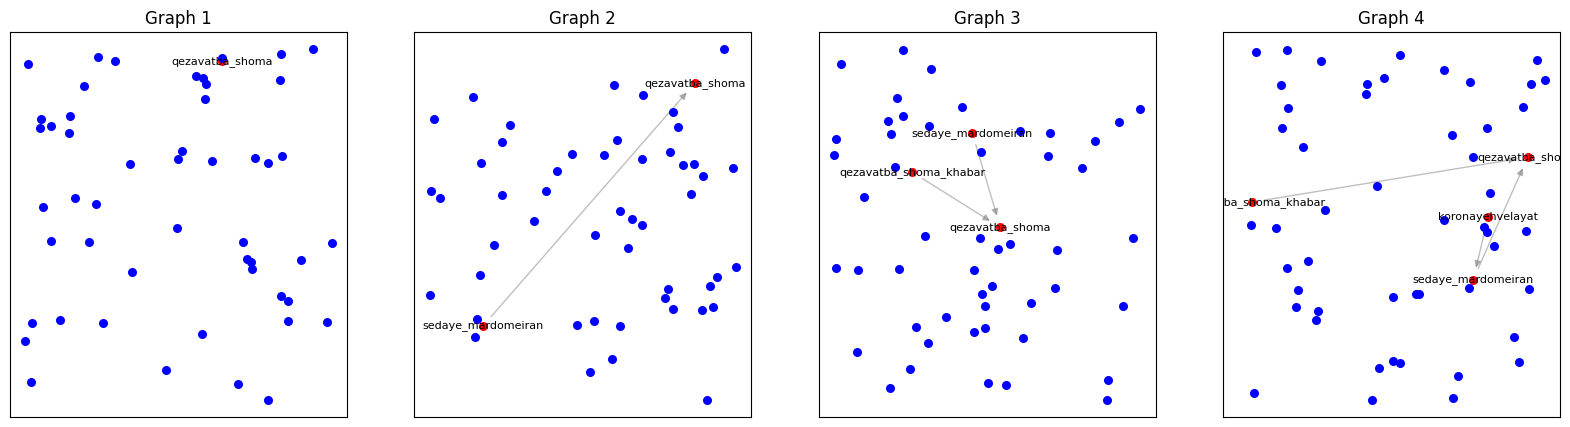

---------iteration 1--------------
{1196169975: 'qezavatba_shoma'}


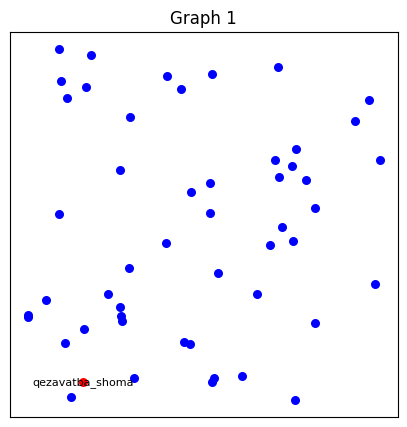

---------iteration 2--------------
{1196169975: 'qezavatba_shoma'}


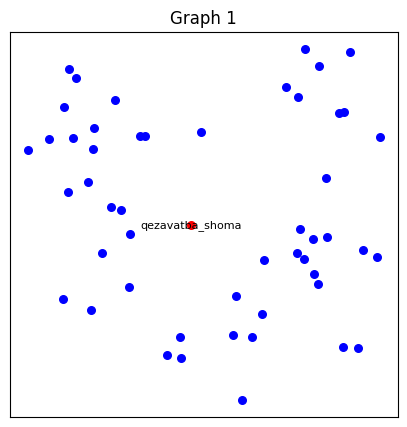

---------iteration 3--------------
{1196169975: 'qezavatba_shoma'}


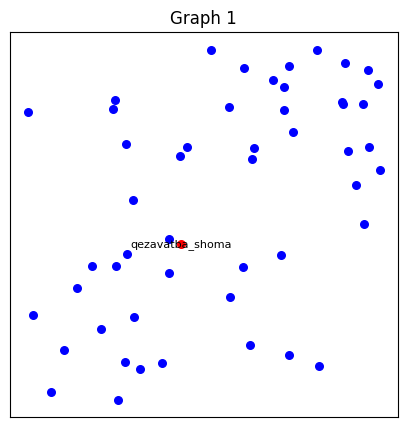

---------iteration 4--------------
{1196169975: 'qezavatba_shoma', 1104300705: 'faryadidarshabhayshiraz', 1100394367: 'kamyondaranfars'}


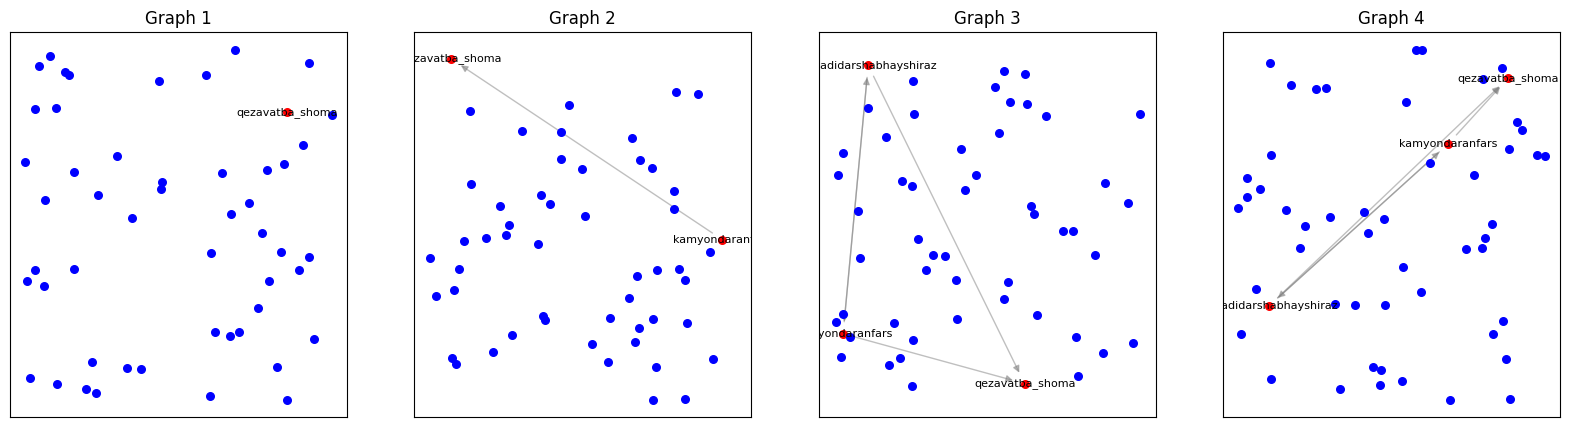

---------iteration 5--------------
{1196169975: 'qezavatba_shoma', 1277073103: 'sokhaniaznikan', 1104300705: 'faryadidarshabhayshiraz', 1291212896: 'iran_protest_tehran', 1100394367: 'kamyondaranfars', 1062052894: 'begooazadi'}


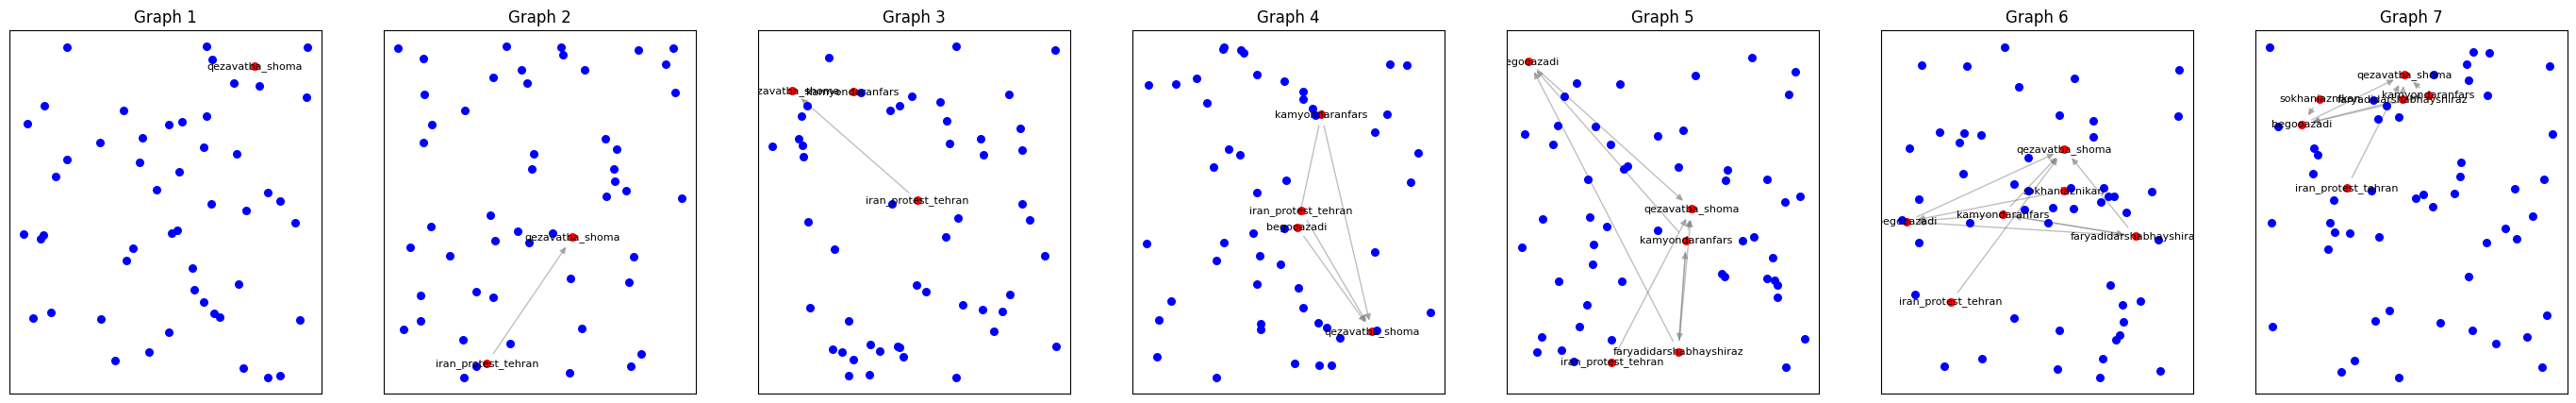

---------iteration 6--------------
{1196169975: 'qezavatba_shoma', 1445970906: 'na_be_dictatory', 1614062361: 'qezavatba_shoma_khabar'}


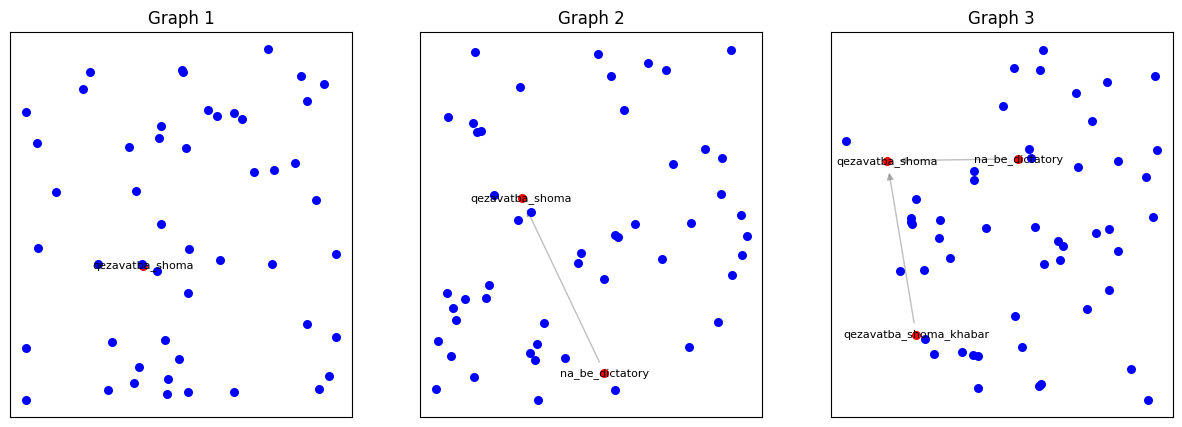

---------iteration 7--------------
{1196169975: 'qezavatba_shoma', 1364914579: 'taninaban'}


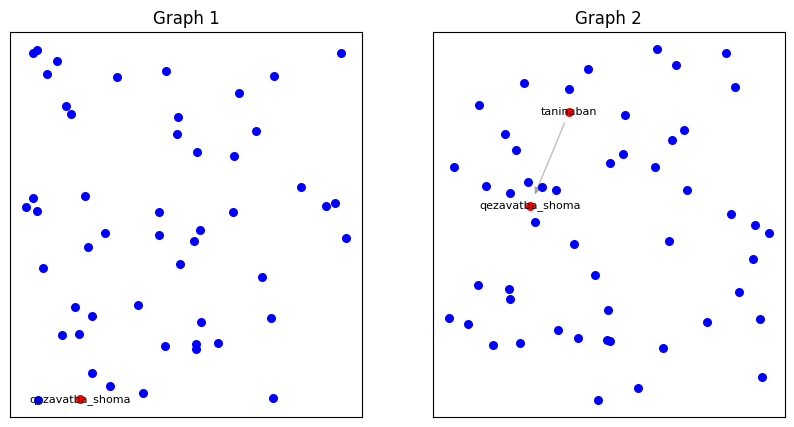

---------iteration 8--------------
{1196169975: 'qezavatba_shoma', 1732066675: 'cityofisfahan'}


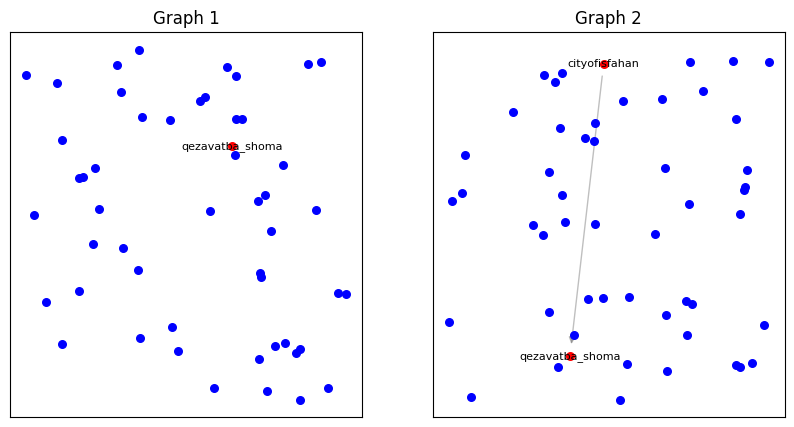

---------iteration 9--------------
{1196169975: 'qezavatba_shoma', 1732066675: 'cityofisfahan'}


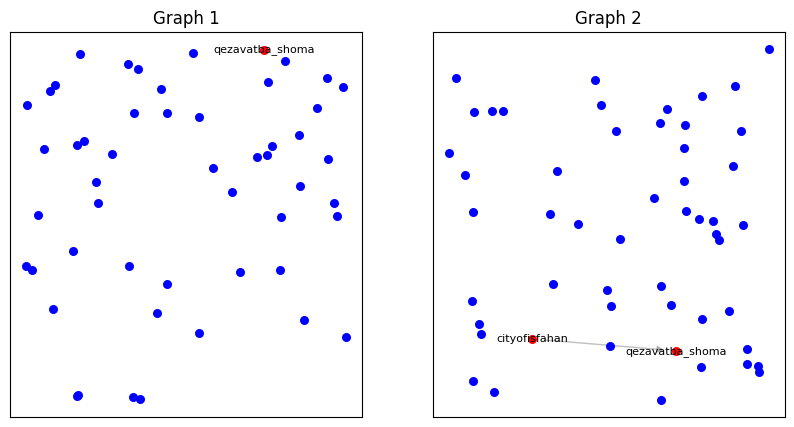

---------iteration 10--------------
{1196169975: 'qezavatba_shoma', 1364914579: 'taninaban'}


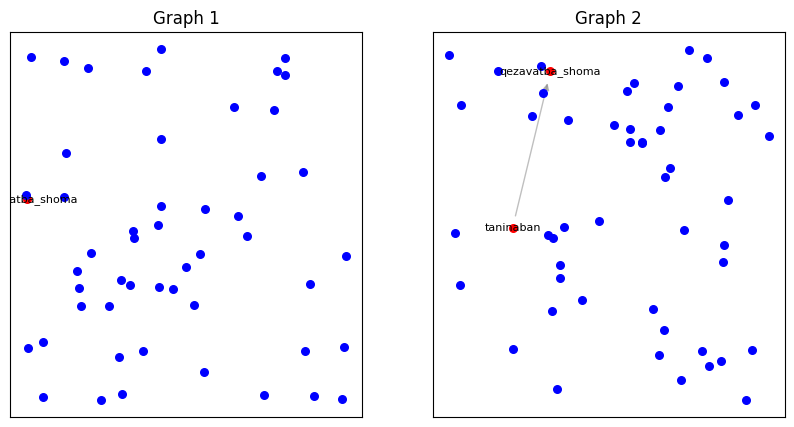

---------iteration 11--------------
{1196169975: 'qezavatba_shoma'}


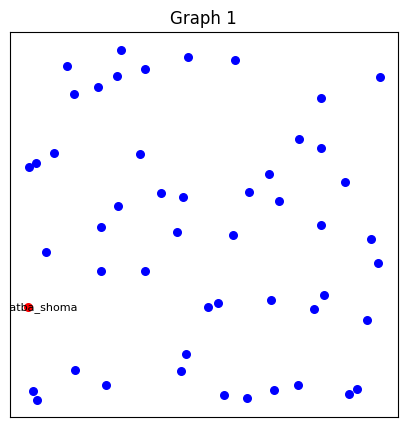

---------iteration 12--------------
{1196169975: 'qezavatba_shoma', 1104300705: 'faryadidarshabhayshiraz', 1397889377: 'faryade_irane', 1364914579: 'taninaban', 1100394367: 'kamyondaranfars'}


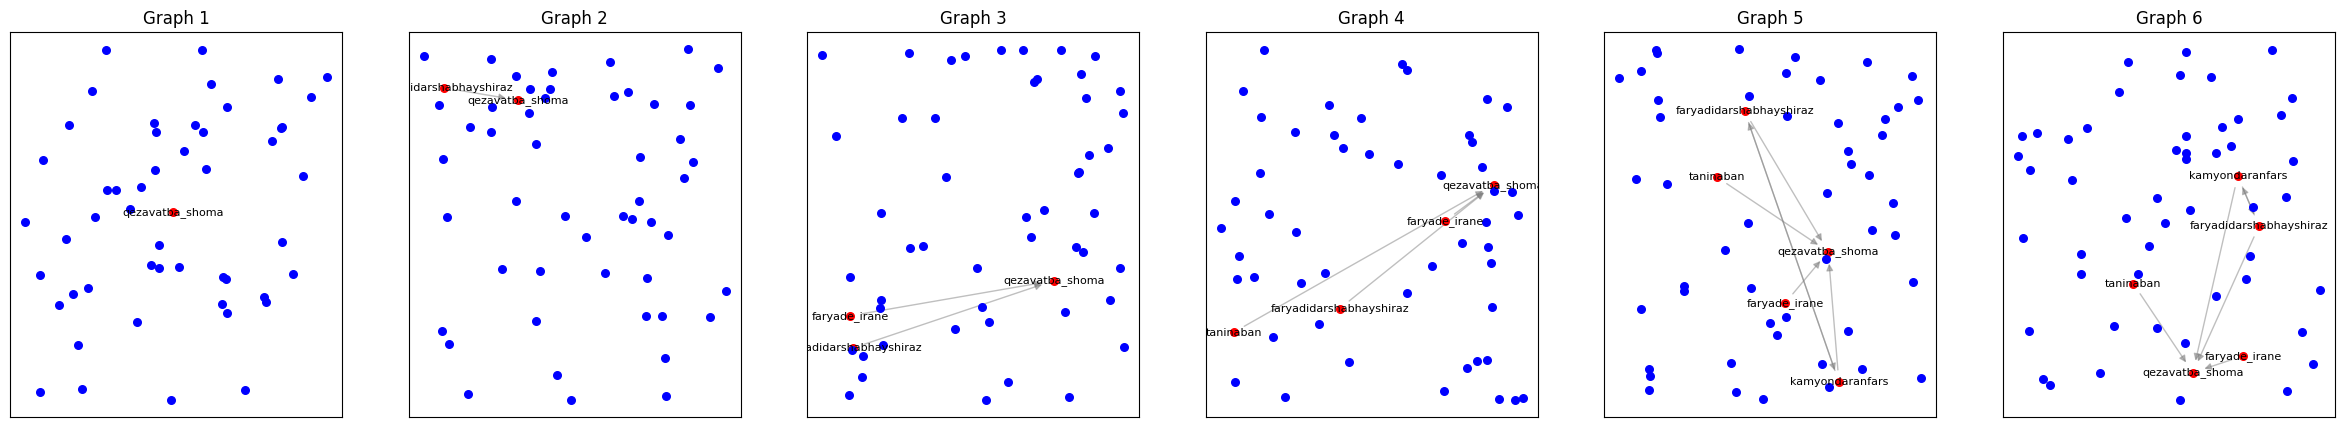

---------iteration 13--------------
{1196169975: 'qezavatba_shoma'}


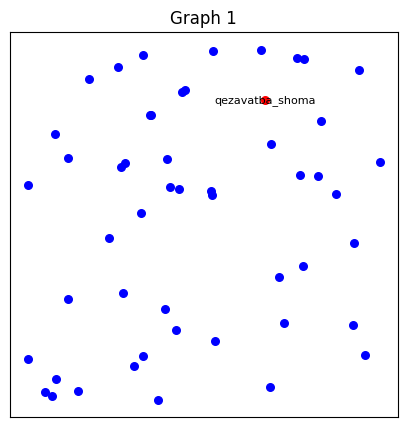

---------iteration 14--------------
{1196169975: 'qezavatba_shoma'}


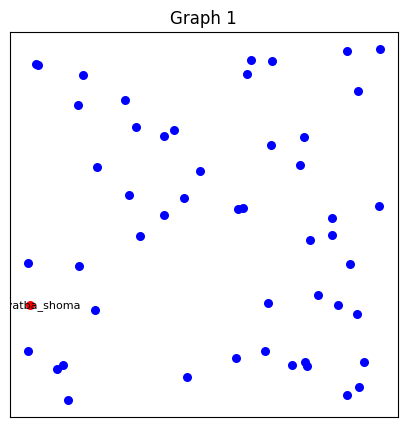

---------iteration 15--------------
{1196169975: 'qezavatba_shoma', 1469896030: 'irankhabarhaa', 1171628448: 'pada_blooch'}


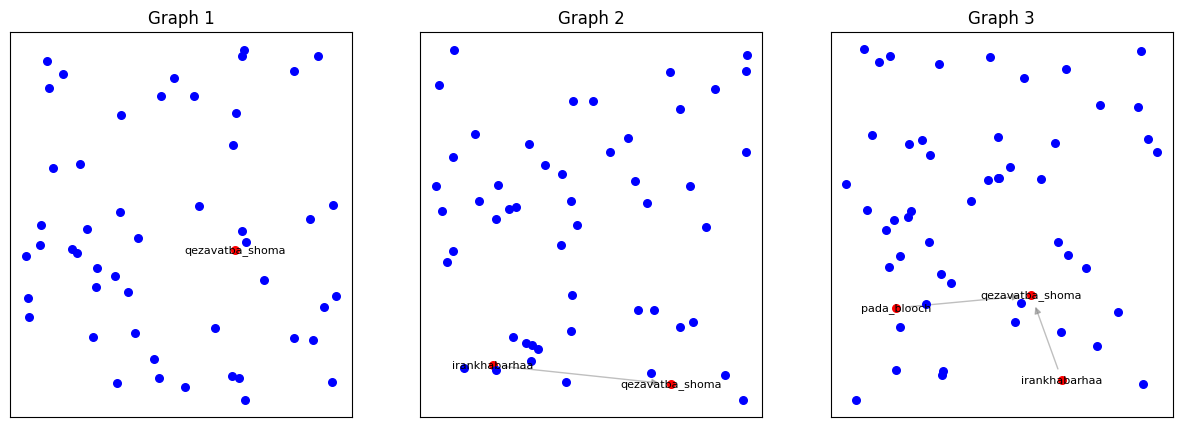

---------iteration 16--------------
{1196169975: 'qezavatba_shoma', 1277073103: 'sokhaniaznikan', 1056917811: 'irannews402', 1469896030: 'irankhabarhaa', 1088267442: 'mardomnews20', 1529228888: 'storyghyam', 1291212896: 'iran_protest_tehran', 1234557457: 'tehranshoreshy', 1062052894: 'begooazadi', 1614062361: 'qezavatba_shoma_khabar'}


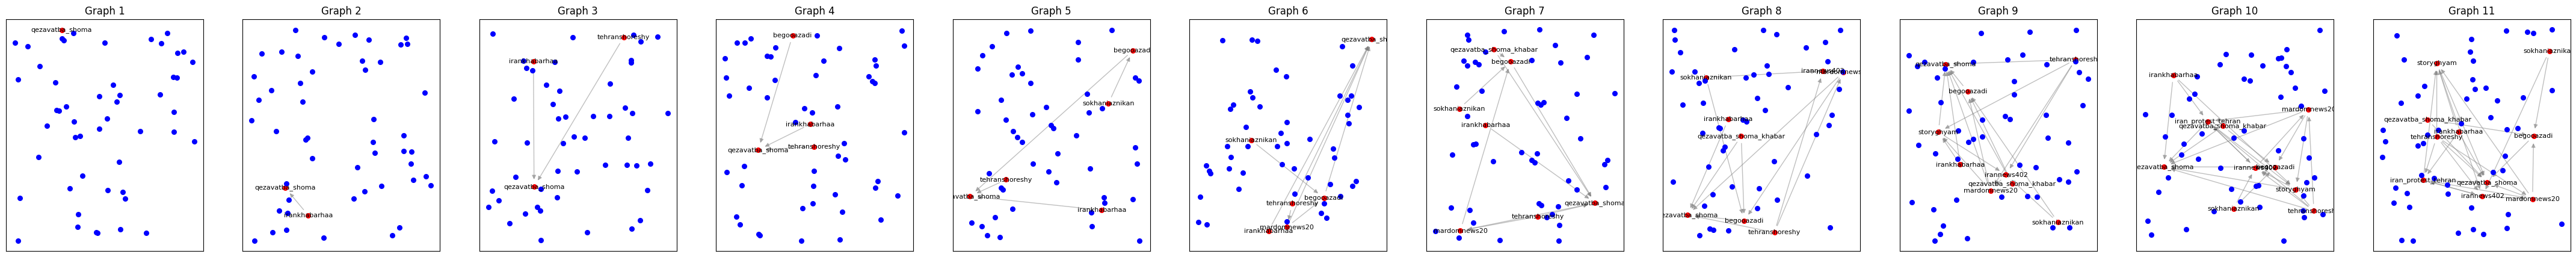

---------iteration 17--------------
{1196169975: 'qezavatba_shoma', 1104300705: 'faryadidarshabhayshiraz', 1100394367: 'kamyondaranfars'}


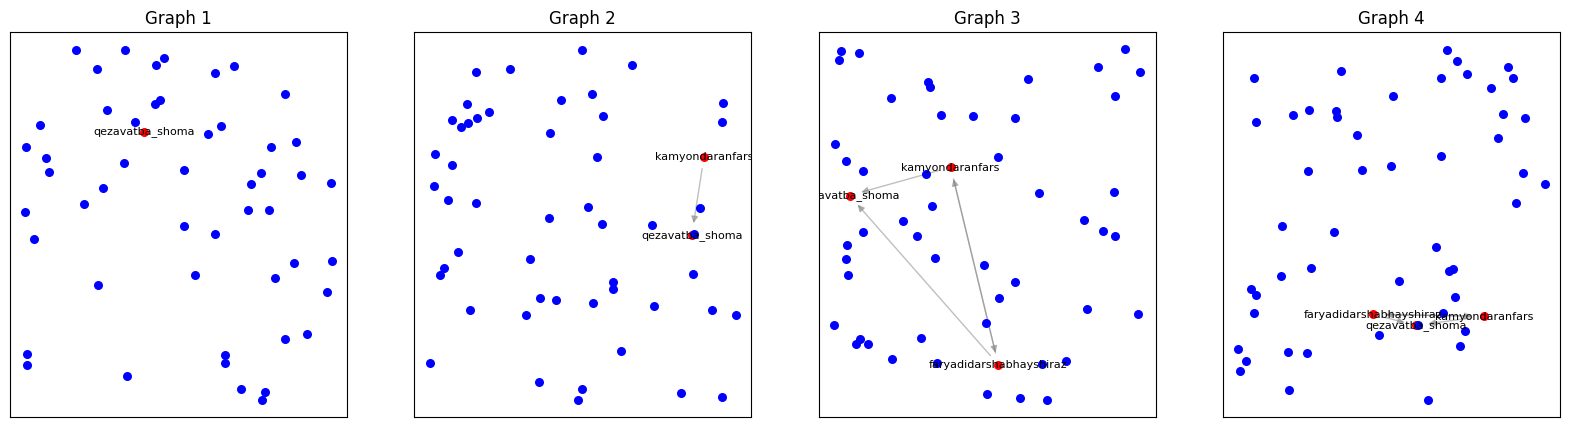

---------iteration 18--------------
{1196169975: 'qezavatba_shoma', 1732066675: 'cityofisfahan', 1204964741: 'sedaye_mardomeiran', 1104300705: 'faryadidarshabhayshiraz', 1100394367: 'kamyondaranfars'}


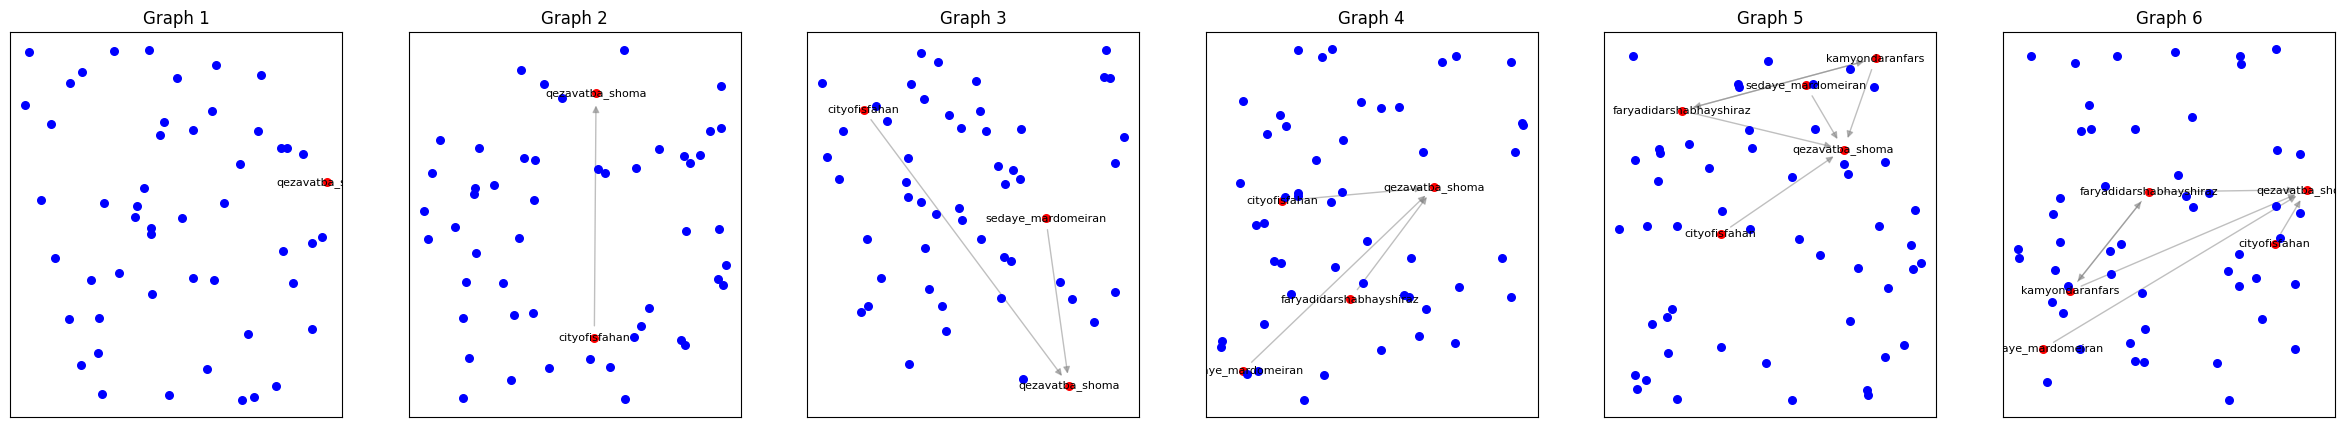

---------iteration 19--------------
{1196169975: 'qezavatba_shoma', 1056917811: 'irannews402', 1088267442: 'mardomnews20', 1374140152: 'forfreedom2', 1445970906: 'na_be_dictatory', 1204964741: 'sedaye_mardomeiran', 1291212896: 'iran_protest_tehran', 1234557457: 'tehranshoreshy'}


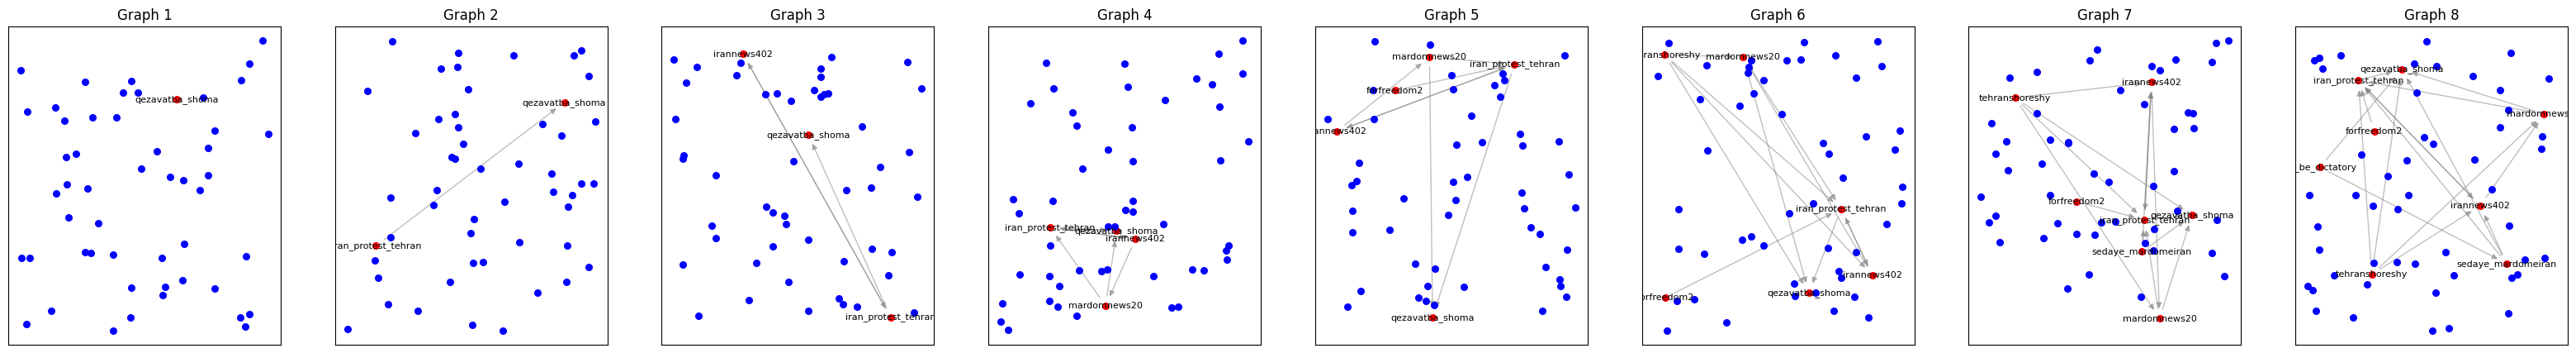

---------iteration 20--------------
{1196169975: 'qezavatba_shoma', 1445970906: 'na_be_dictatory', 1204964741: 'sedaye_mardomeiran', 1104300705: 'faryadidarshabhayshiraz', 1246585139: 'koronayehvelayat', 1397889377: 'faryade_irane', 1100394367: 'kamyondaranfars'}


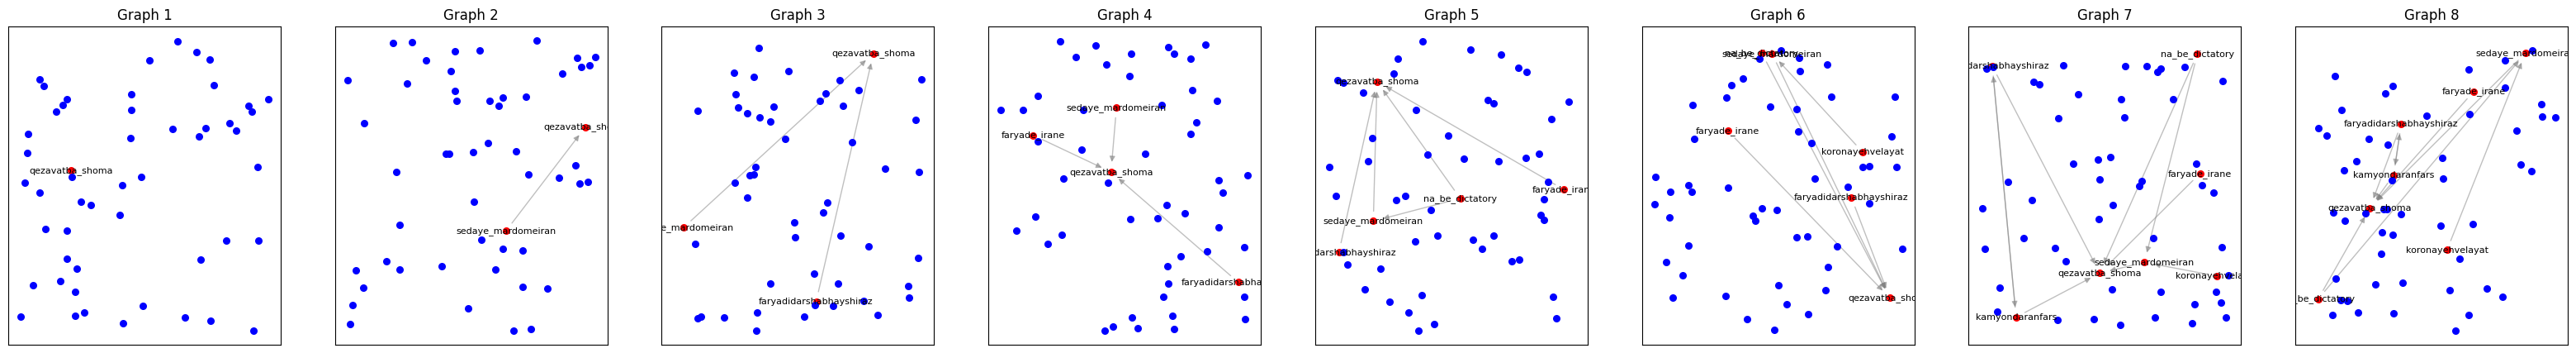

---------iteration 21--------------
{1196169975: 'qezavatba_shoma'}


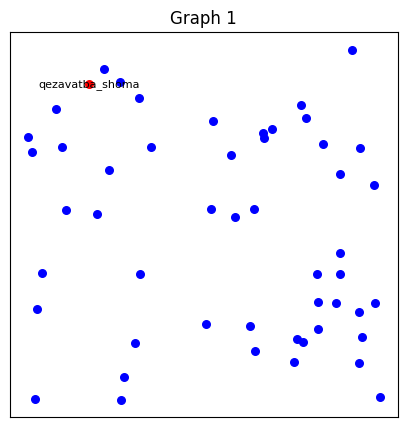

---------iteration 22--------------
{1196169975: 'qezavatba_shoma', 1204964741: 'sedaye_mardomeiran', 1246585139: 'koronayehvelayat', 1234557457: 'tehranshoreshy'}


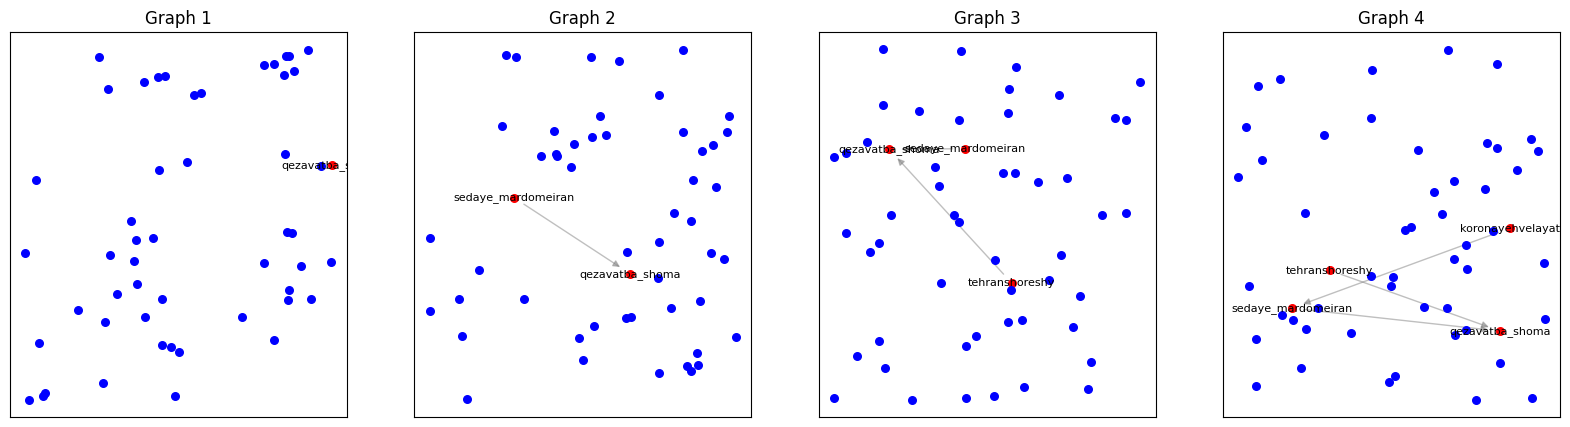

---------iteration 23--------------
{1196169975: 'qezavatba_shoma', 1364914579: 'taninaban'}


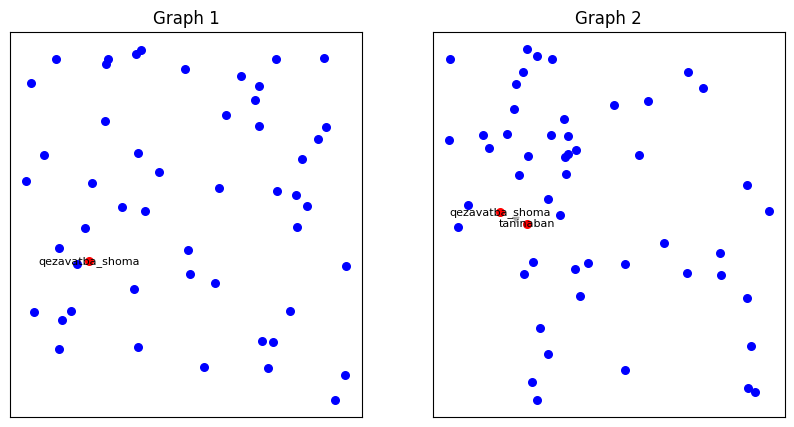

---------iteration 24--------------
{1196169975: 'qezavatba_shoma', 1614062361: 'qezavatba_shoma_khabar'}


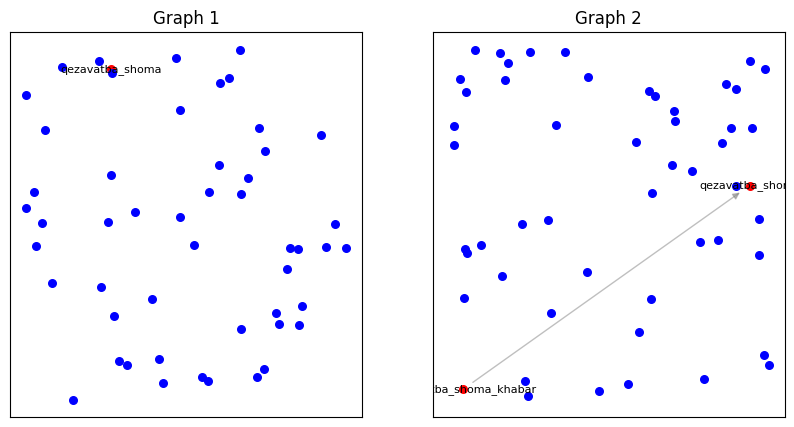

---------iteration 25--------------
{1196169975: 'qezavatba_shoma', 1469896030: 'irankhabarhaa'}


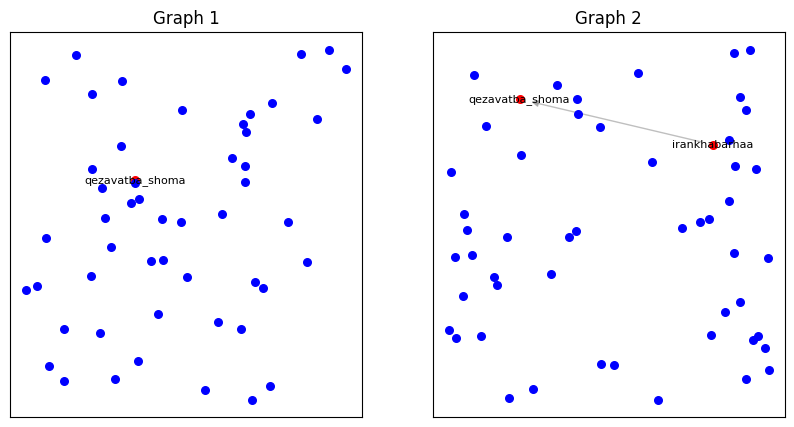

---------iteration 26--------------
{1196169975: 'qezavatba_shoma'}


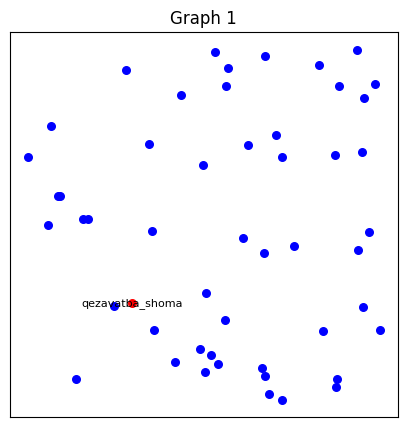

---------iteration 27--------------
{1196169975: 'qezavatba_shoma'}


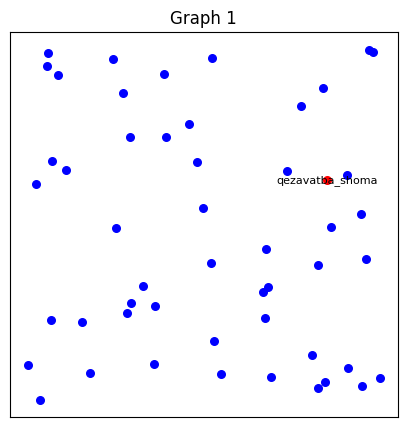

---------iteration 28--------------
{1196169975: 'qezavatba_shoma'}


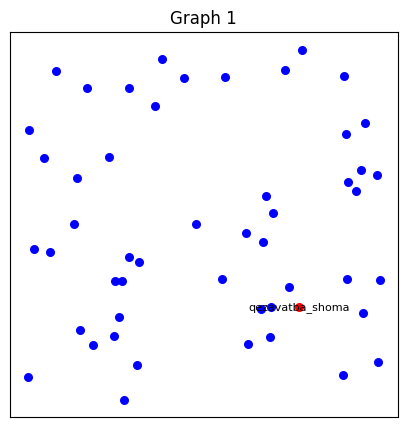

---------iteration 29--------------
{1196169975: 'qezavatba_shoma', 1171628448: 'pada_blooch'}


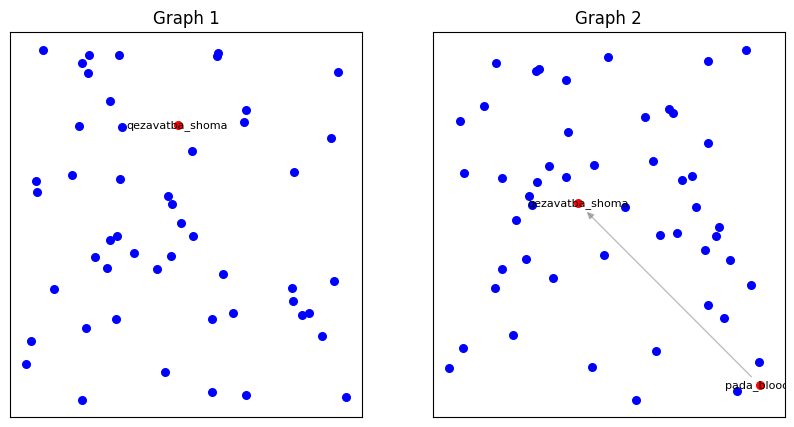

[4,
 1,
 1,
 1,
 3,
 6,
 3,
 2,
 2,
 2,
 2,
 1,
 5,
 1,
 1,
 3,
 10,
 3,
 5,
 8,
 7,
 1,
 4,
 2,
 2,
 2,
 1,
 1,
 1,
 2]

In [22]:
seeds = find_refference_nodes(G,3)
simulate_spread(G, start_node=seeds[0],visualization=True,iterations=30)

In [23]:
from itertools import islice

def find_top_high_fashaness1(G, start_node, number):
    top_high_fashaness = set()

    community_hbt_share = round(0.5 * number)
    community_brg_share = round(0.4 * number)
    totalgraph_hbt_share = round(0.1 * number)

    # Share from target community top betweenness nodes
    print("Target community: ", G.nodes[start_node]['modularity_class'])
    target_community_nodes = find_by_modularity_class(G.nodes[start_node]['modularity_class'], G)
    target_community_nodes.remove(start_node)
    community_hbt_share = min(community_hbt_share, len(target_community_nodes))
    tops = find_top_high_measure_list(target_community_nodes, G, community_hbt_share ,'betweenness_centrality')
    top_high_fashaness.update(tops)
    
    # Share from community bridge nodes
    all_possible_bridges = set()
    bridge_nodes = []
    for node in target_community_nodes:
        incoming_neighbors = list(G.predecessors(node))
        all_possible_bridges.update(incoming_neighbors)
    for node in all_possible_bridges:
        if node not in target_community_nodes:
            bridge_nodes.append(node)
    bridge_nodes = find_top_bridges(G, bridge_nodes)
    community_brg_share = min(community_brg_share, len(bridge_nodes))
    top_high_fashaness.update(
        node for node in bridge_nodes
        if node not in top_high_fashaness and len(top_high_fashaness) <= (community_brg_share + community_hbt_share)
    )
    
    # Share from total graph top betweenness nodes
    tops = find_top_high_measure(G, len(G.nodes()) ,'betweenness_centrality')
    top_high_fashaness.update(
        node for node in tops
        if node not in top_high_fashaness and len(top_high_fashaness) <= number
    )
    
    return list(top_high_fashaness)

In [26]:
from itertools import islice

def find_top_high_fashaness(G, target_community, number):
    top_high_fashaness = set()

    community_hbt_share = round(0.5 * number)
    community_brg_share = round(0.4 * number)
    totalgraph_hbt_share = round(0.1 * number)

    # Share from target community top betweenness nodes
    print("Target community: ", target_community)
    target_community_nodes = find_by_modularity_class(target_community, G)
    community_hbt_share = min(community_hbt_share, len(target_community_nodes))
    tops = find_top_high_measure_list(target_community_nodes, G, community_hbt_share ,'betweenness_centrality')
    top_high_fashaness.update(tops)
    
    # Share from community bridge nodes
    all_possible_bridges = set()
    bridge_nodes = []
    for node in target_community_nodes:
        incoming_neighbors = list(G.predecessors(node))
        all_possible_bridges.update(incoming_neighbors)
    for node in all_possible_bridges:
        if node not in target_community_nodes:
            bridge_nodes.append(node)
    bridge_nodes = find_top_bridges(G, bridge_nodes)
    community_brg_share = min(community_brg_share, len(bridge_nodes))
    top_high_fashaness.update(
        node for node in bridge_nodes
        if node not in top_high_fashaness and len(top_high_fashaness) <= (community_brg_share + community_hbt_share)
    )
    
    # Share from total graph top betweenness nodes
    tops = find_top_high_measure(G, len(G.nodes()) ,'betweenness_centrality')
    top_high_fashaness.update(
        node for node in tops
        if node not in top_high_fashaness and len(top_high_fashaness) <= number
    )
    
    return list(top_high_fashaness)

In [27]:
def find_top_high_fashaness2(G, start_node, number):
    top_high_fashaness = set()

    # Calculate shares
    community_hbt_share = round(0.5 * number)
    community_brg_share = round(0.4 * number)
    totalgraph_hbt_share = round(0.1 * number)

    # Share from target community top betweenness nodes
    # print("Target community: ", G.nodes[start_node]['modularity_class'])
    target_community_nodes = find_by_modularity_class(G.nodes[start_node]['modularity_class'], G)
    target_community_nodes.remove(start_node)
    community_hbt_share = min(community_hbt_share, len(target_community_nodes))
    tops = find_top_high_measure_list(target_community_nodes, G, community_hbt_share, 'betweenness_centrality')
    top_high_fashaness.update(tops)

    
    # Share from community bridge nodes
    all_possible_bridges = set()
    bridge_nodes = []
    for node in target_community_nodes:
        incoming_neighbors = list(G.predecessors(node))
        all_possible_bridges.update(incoming_neighbors)
    for node in all_possible_bridges:
        if node not in target_community_nodes:
            bridge_nodes.append(node)
    bridge_nodes = find_top_bridges(G, bridge_nodes)
    community_brg_share = min(community_brg_share, len(bridge_nodes))
    for node in bridge_nodes:
        if len(top_high_fashaness) < (community_hbt_share + community_brg_share):
            if node not in top_high_fashaness:
                top_high_fashaness.add(node)

    
    # Share from total graph top betweenness nodes
    tops = find_top_high_measure(G, len(G.nodes()), 'betweenness_centrality')
    for node in tops:
        if len(top_high_fashaness) < number:
            if node not in top_high_fashaness:
                top_high_fashaness.add(node)

    return list(top_high_fashaness)

In [133]:

a = find_top_high_fashaness(G, 1132309696, 10)

Target community:  189


In [53]:
seed_nodes = find_refference_nodes(G,200)

a = [G.nodes[n]['Label'] for n in seed_nodes]
a

['naghdeaval',
 'isna94',
 'khabar_fouri',
 'tasnimnews',
 'iribnews',
 'akhbare_fouri_ir',
 'zarrehbin_news',
 'rasadkhabar',
 'javadrooh',
 'entekhab_ir',
 'irna_1313',
 'bisimchimedia',
 'eslahatnews',
 'jamarannews',
 'tarknews',
 'taibadnews',
 'azarnegah_ir',
 'hammihanonline',
 'ghassabkola',
 'akharinkhabar',
 'etemadonline',
 'yjcnewschannel',
 'baamdadeno',
 'asskk_me',
 'myasriran',
 'sahamnewsorg',
 'snntv',
 'ilnair',
 'chandsanieh',
 'moniban_news',
 'gilkhabar',
 'kakhresaneh',
 'sobhema_ir',
 'khabarfarda_ir',
 'mehrnews',
 'skumst',
 'khabaronline_ir',
 'farsna',
 'akhbarefori']

In [61]:
df = pd.read_excel('channels_data/combined_file.xlsx')

usernames =['naghdeaval',
 'isna94',
 'khabar_fouri',
 'tasnimnews',
 'iribnews',
 'akhbare_fouri_ir',
 'zarrehbin_news',
 'rasadkhabar',
 'javadrooh',
 'entekhab_ir',
 'irna_1313',
 'bisimchimedia',
 'eslahatnews',
 'jamarannews',
 'tarknews',
 'taibadnews',
 'azarnegah_ir',
 'hammihanonline',
 'ghassabkola',
 'akharinkhabar',
 'etemadonline',
 'yjcnewschannel',
 'baamdadeno',
 'asskk_me',
 'myasriran',
 'sahamnewsorg',
 'snntv',
 'ilnair',
 'chandsanieh',
 'moniban_news',
 'gilkhabar',
 'kakhresaneh',
 'sobhema_ir',
 'khabarfarda_ir',
 'mehrnews',
 'skumst',
 'khabaronline_ir',
 'farsna',
 'akhbarefori']



existing_usernames = set(df['نام کاربری منبع'])
missing_usernames = [user for user in usernames if user not in existing_usernames]
missing_usernames
  

['khabar_fouri',
 'tasnimnews',
 'bisimchimedia',
 'eslahatnews',
 'etemadonline',
 'asskk_me',
 'myasriran']

In [57]:
existing_usernames

{'ABOIFARAS',
 'ARKA_AZ',
 'ATkosfr',
 'A_seyed_mahdi',
 'AbdiMedia',
 'Adentekhabat',
 'Akamsalehii',
 'AkharinFouri',
 'AkharinTwiit',
 'AkhbarMajles_ir',
 'Akhbar_avval',
 'Akhbar_furii',
 'Aram_Hrm',
 'AramanNews',
 'Asrtabriz',
 'Aynapresstv',
 'AzarBakhish_ir',
 'BegooAzadi',
 'BehnamSamadi_ir',
 'Bii_Taarof',
 'BisimchiMedia',
 'Bistosi_news',
 'BizimSulduz',
 'BloghMazand',
 'Bornanews_ir',
 'BourseNews',
 'Bsansor98',
 'Buh_LOL',
 'C_B_SHAHZADEH',
 'DashgNEWS',
 'DefenceTurks',
 'Defender_iri',
 'Delbaranechanel',
 'DemocracyRepublicNetwork',
 'Dordonepublic',
 'DrTel18',
 'Econ_Fouri',
 'Eghtesadnews_com',
 'ElyaGallery',
 'Entekhab_Fouri',
 'Entekhabatnoo',
 'Eslahatnews',
 'EtemadOnline',
 'GorganTomorrow',
 'GozaarMedia',
 'HADISDEll_313',
 'Haazer_javab1',
 'Har_Dam_Biil',
 'HeyDaryioon',
 'Hezbollah_com',
 'IMANImohamad51',
 'IranAzadie',
 'IraneAzad_News',
 'Irani_News_channel',
 'IranintlTV',
 'JENewspaper',
 'JamejamDaily',
 'Jaryanno',
 'Jsnewsir',
 'K_MjM',
 'Karimi

In [59]:
# df1 = pd.read_excel('channels_data/total_news.xlsx')
# df2 = pd.read_excel('channels_data/total_news2.xlsx')
# df3 = pd.read_excel('channels_data/total_news3.xlsx')
df4 = pd.read_excel('channels_data/total5.xlsx')
combined_df = pd.concat([combined_df, df4], ignore_index=True)
combined_df.to_excel('channels_data/combined_file.xlsx', index=False)

In [62]:
len(combined_df)

21057

In [60]:
usernames = [
    'qezavatba_shoma', 'mardom_press', 'recenteconomicnews', 'mizanplus', 'sobhtoos', 'iraq_aqlim',
    'fazeli_mohammad', 'militech', 'tejaratnews', 'simaintv', 'etebarbroker', 'talkhand_siyasi2',
    'tabnak', 'namayande_graph', 'nezamitarin', 'barandaz_fesharbokhor', 'zarinkhabar', 'newwaypolitics',
    'sehrama1', 'bidari_com', 'lalalandtm', 'protest_iran', 'didebane_enghelab', 'akhbar_avval',
    'tahlilzamane', 'mahdaviatakhbar', 'bistosi_news', 'naghdeaval', 'aram_hrm', 'qods_com',
    'shahzadenajeran', 'maktubaaat', 'twitter_bourse', 'newswolrd_iran', 'payame_eghtesad', 'majles',
    'emrooz', 'piknikanalyst', 'amariyoun', 'farazdaily', 'hezbollah_com', 'oyaqliq',
    'savojbolagh_news_agency', 'jangerevayatha', 'roozplus_ir', 'har_dam_biil', 'purson_ir',
    'tahavolatworld', 'rfrens', 'shamsnews_ir', 'simayazaditv', 'isna94', 'khabar_fouri', 'tahajjor',
    'iribnews_com', 'siyasitaanz', 'qalampress_ir', 'yaran_hajqassem_shuhdaye2', 'gavmd', 'tasnimnews',
    'kharmagaas', 'sedayeslahat', 'twiier_news', 'intelligent_technique', 'zaanoone', 'tabrizimaz',
    'farhangeiranian', 'nezamabad1395alghameh', 'c_b_shahzadeh', 'shoukarani', 'khabarchekhabar',
    'utopia_online', 'anti_takhrib', 'toofaneyazd', 'noooohooojjj', 'ak_h7', 'qartalnewss',
    'emtedadnet', 'noandishnews', 'iranazadie', 'kalanshahr', 'martyrbagherithe', 'dashgnews',
    'ardakaneemrooz_ir', 'akhbarenabeilam', 'imanimohamad51', 'iribnews', 'rokna_news',
    'defenceturks', 'radinnews', 'akhbarebank', 'a_seyed_mahdi', 'sabetitelegram', 'pirpshteh',
    'omid_media', 'mortezaebad', 'akhbare_fouri_ir', 'sedaymasoor', 'mohemfoori', 'zarrehbin_news',
    'masaf_raefipour5', 'makshufat', 'najaf_tarakameh', 'akhbarefouri_iran', 'ehsan_movahedian',
    'oskumycity', 'mardomnews20', 'khabarvijehtaybad', 'sepehrazadi', 'gizmiztel', 'abdiabbas',
    'khateslahat', 'teletabnak', 'rasadkhabar', 'akhbar_montakhab', 'gorgantomorrow', 'noghteh3',
    'sepah_cyberi_iran', 'fasle_bidarii', 'eghtesadonline', 'iranfnews', 'mersadmedia', 'k_mjm',
    'parsinehnews', 'salam_sari', 'shoutnews', 'armanekerman1', 'akharinfouri', 'storyghyam',
    'didarnews1', 'montazeran_abasaleh_313', 'anjomanemodaresin', 'jaykhas', 'jepkaa',
    'navadeeghtesadi', 'behnamsamadi_ir', 'ilammoallem', 'sepahcybery', 'hosein_darabi',
    'ir_takhribchi', 'mr_economy', 'kafnews', 'tehran_vije', 'motazed1361', 'tadbir96dolat',
    'asianewsiran', 'rasttine', 'sedayeilaam', 'aynapresstv', 'mypersia24', 'media_falagh',
    'shabestarinfo', 'boursenews', 'bg_ae', 'moferferi0', 'azarijahromi', 'hadisdell_313',
    'rouydad24', 'janan113', 'zohoor_iran', 'namahramat', 'nezami_news_ir', 'proxci1',
    'alaeddin_bourse', 'jang_com', 'irani_news_channel', 'didebaniran', 'shomareshmakooszohor',
    'entekhabe_khas', 'khabar_anonymous', 'rezaalijani41', 'adentekhabat', 'jsnewsir',
    'meysamnews7', 'heydaryioon', 'farhikhteganonline', 'javadrooh', 'eghtesad_fori',
    'elyagallery', 'arka_az', 'haazer_javab1', 'dolaat', 'qazvin_today', 'aztabriz',
    'khabre_fouril', 'baharnewsir', 'salamonlline', 'farhangian_tabriz', 'entekhab_ir',
    'twtenghelabi', 'delbaranechanel', 'pedarefetneh', 'military_hut', 'shahrvandonlion1400',
    'borseforex20181397', 'abdimedia', 'lialestan_news', 'emadism', 'irna_1313', 'farsqom',
    'massorebozorg', 'bisimchimedia', 'sarbazane_g', 'raavionline1', 'tehranfarsnews',
    'khoybilgi', 'anajnews', 'eslahatnews', 'jamejamdaily', 'ansar_network', 'squad_iran',
    'lotfollahmahdikhaninew', 'khabare_vije', 'aboifaras', 'avayeiran99', 'tarfand_mahshr',
    'sharghdaily', 'twovadeh', 'ziabar65', 'miyantitr', 'nabjahadiii', 'alef_news',
    'bornanews_ir', 'mahdavifar2021', 'rustayevardan', 'jamarannews', 'zohour_i12',
    'tarknews', 'ali_gholhaky', 'rajanews_com', 'jebheeslahatiranazad', 'buh_lol',
    'newsmiyaneh', 'sepah_quds', 'uttweet', 'proxi_khabar_negar', 'taibadnews', 'nasrnews',
    'ghomeishi3', 'americanislam', 'jalaeipour', 'salam_iraniann', 'mostaghelonline',
    'renani_mohsen', 'azarnegah_ir', 'hashiyeh_news24', 'jenewspaper', 'democracyrepublicnetwork',
    'farsighafghaz', 'hamnews90', 'airwariors', 'eslaahatkhabar', 'm_mahdibaba', 'negin_news',
    'insta_enghelabi', 'gozaarmedia', 'quds_fouri', 'hammihanonline', 'horand_khabar',
    'fooladshahr24', 'mersadnewschannel', 'jahatpress', 'roshangari_ir', 'tahlil_fouri',
    'azar_anjoman', 'gorajdiyarkohan', 'bii_taarof', 'military_meme99', 'fk_sabz',
    'mashreghnews_channel', 'majles_news_ir', 'shafaqna_farsi', 'mrtahl']
existing_usernames = set(combined_df['نام کاربری منبع'])
missing_usernames = [user for user in usernames if user not in existing_usernames]
for i, j in enumerate(missing_usernames):
  print(i, j)

0 simaintv
1 talkhand_siyasi2
2 newwaypolitics
3 lalalandtm
4 akhbar_avval
5 tahlilzamane
6 bistosi_news
7 aram_hrm
8 qods_com
9 shahzadenajeran
10 newswolrd_iran
11 piknikanalyst
12 hezbollah_com
13 savojbolagh_news_agency
14 har_dam_biil
15 rfrens
16 simayazaditv
17 khabar_fouri
18 tahajjor
19 tasnimnews
20 zaanoone
21 tabrizimaz
22 c_b_shahzadeh
23 noandishnews
24 iranazadie
25 martyrbagherithe
26 dashgnews
27 imanimohamad51
28 rokna_news
29 defenceturks
30 akhbarebank
31 a_seyed_mahdi
32 sabetitelegram
33 mohemfoori
34 khateslahat
35 teletabnak
36 gorgantomorrow
37 k_mjm
38 akharinfouri
39 storyghyam
40 navadeeghtesadi
41 behnamsamadi_ir
42 sepahcybery
43 mr_economy
44 rasttine
45 sedayeilaam
46 aynapresstv
47 boursenews
48 hadisdell_313
49 nezami_news_ir
50 irani_news_channel
51 khabar_anonymous
52 adentekhabat
53 jsnewsir
54 meysamnews7
55 heydaryioon
56 elyagallery
57 arka_az
58 haazer_javab1
59 qazvin_today
60 delbaranechanel
61 abdimedia
62 massorebozorg
63 bisimchimedia
64 te

In [40]:
len(existing_usernames)

443

In [43]:
a = find_refference_nodes(G,100)
a

[1106958042,
 1374693748,
 1156829958,
 1168273313,
 1005665139,
 1002062924,
 1001976122,
 1383604855,
 1004576149,
 1073422940,
 1990273594,
 1072832422,
 1803583427,
 1074370071,
 1007883087,
 1261623772,
 1101759541,
 1006457889,
 1058667053,
 1076720298,
 1005280116,
 1068487996,
 1006165084,
 1005866359,
 1346732056,
 1000018594,
 1051127970,
 1101039400,
 1006227643,
 1068763227,
 1006263686,
 1956708093,
 1000975413,
 1107633871,
 1004148460,
 1532857131,
 1013336404,
 1003137582,
 1007007698,
 1127390421,
 1002739327,
 1027676885,
 1189566498,
 1004793780,
 1007884158,
 1004135749,
 1002843824,
 1091867953,
 1006212930,
 1006298883,
 1066357067,
 1069291200,
 1489742853,
 1368575513,
 1006441933,
 1376024111,
 1859547507,
 1454361599,
 1665481037,
 1779082644,
 1258023043,
 1002765601,
 1083368581,
 1006914438,
 1006939659,
 1369092212,
 1056093184,
 1004069147,
 1002531766,
 1447037192,
 1001621611]

In [150]:
def compare_centrality_measures(length, G):
    seed_nodes = find_refference_nodes(G,1)
    betweenness_disable_diffs = importance_disable_diffs = closeness_disable_diffs = fasha_disable_diffs = 0

    top_high_betweenness = find_top_high_measure(G, 100,'betweenness_centrality')
    top_high_importance = find_top_high_measure(G, 100, 'importance')
    top_high_closeness = find_top_high_measure(G, 100, 'closeness_centrality')
    top_high_importance = find_top_high_measure(G, 100, 'importance')
    # top_high_fasha = find_top_high_fashaness(G, start_node , 100)
    
    for i, node in enumerate(random.sample(seed_nodes, length)):

        top_high_fasha = find_top_high_fashaness(G, node , 100)
        
        start_node = node
        print(i+1, "-",G.nodes[start_node]['Label'])
        
        # normal diffusion
        normal_spread_count = simulate_spread(G, start_node, visualization=False, iterations=30)
        
        # diffusion after disabling top high betweenness node
        disabled_high_betweenness_spread_count = simulate_spread(G, start_node, disabled_nodes=top_high_betweenness, visualization=False, iterations=30)
    
        # diffusion after disabling top high importance node        
        disabled_high_importance_spread_count = simulate_spread(G, start_node, disabled_nodes=top_high_importance, visualization=False, iterations=30)
        
        # diffusion after disabling top high closeness node
        disabled_high_closeness_spread_count = simulate_spread(G, start_node, disabled_nodes=top_high_closeness, visualization=False, iterations=30)

        # diffusion after disabling top high fashaness node
        disabled_high_fasha_spread_count = simulate_spread(G, start_node, disabled_nodes=top_high_fasha, visualization=False, iterations=30)
    
        # comparision
        mean_reach = sum(normal_spread_count)/len(normal_spread_count)
        mean_reach_disabled = sum(disabled_high_betweenness_spread_count)/len(disabled_high_betweenness_spread_count)
        mean_reach_disabled2 = sum(disabled_high_importance_spread_count)/len(disabled_high_importance_spread_count)
        mean_reach_disabled3 = sum(disabled_high_closeness_spread_count)/len(disabled_high_closeness_spread_count)
        mean_reach_disabled4 = sum(disabled_high_fasha_spread_count)/len(disabled_high_fasha_spread_count)
        
        print("Diffusion Result:", normal_spread_count, "mean reach: ",round(mean_reach))
        print("After disabling top Betweenness nodes:", disabled_high_betweenness_spread_count,  "mean reach: ",round(mean_reach_disabled,2))
        print("After disabling top Importance nodes:", disabled_high_importance_spread_count,  "mean reach: ",round(mean_reach_disabled2,2))
        print("After disabling top Closeness nodes:", disabled_high_closeness_spread_count,  "mean reach: ",round(mean_reach_disabled3,2))
        print("After disabling top Fasha nodes:", disabled_high_fasha_spread_count,  "mean reach: ",round(mean_reach_disabled4,2))
    
        betweenness_disable_diffs += (mean_reach - mean_reach_disabled)
        importance_disable_diffs += (mean_reach - mean_reach_disabled2)
        closeness_disable_diffs += (mean_reach - mean_reach_disabled3)
        fasha_disable_diffs += (mean_reach - mean_reach_disabled4)
    
        print("Betweenness disable effect: ", betweenness_disable_diffs)
        print("Importance disable effect: ", importance_disable_diffs)
        print("Closeness disable effect: ", closeness_disable_diffs)
        print("Fasha disable effect: ", fasha_disable_diffs)

In [152]:
compare_centrality_measures(10, G)

1 - rahavardeksh
Diffusion Result: [2, 5, 2, 7, 2, 2, 2, 2, 7, 2, 2, 5, 3, 2, 2, 1, 3, 5, 7, 3, 2, 2, 2, 1, 2, 3, 2, 3, 5, 1] mean reach:  3
After disabling top Betweenness nodes: [2, 2, 2, 2, 1, 3, 6, 3, 1, 1, 2, 5, 2, 5, 1, 3, 1, 2, 2, 2, 6, 1, 3, 2, 1, 3, 3, 1, 3, 4] mean reach:  2.5
After disabling top Importance nodes: [2, 2, 2, 2, 2, 6, 1, 6, 2, 2, 6, 5, 1, 3, 2, 5, 7, 2, 2, 4, 2, 6, 2, 1, 7, 3, 1, 3, 2, 3] mean reach:  3.13
After disabling top Closeness nodes: [1, 1, 2, 2, 4, 2, 5, 2, 1, 2, 3, 3, 6, 1, 2, 2, 6, 1, 2, 3, 5, 6, 2, 1, 1, 1, 1, 6, 1, 2] mean reach:  2.57
After disabling top Fasha nodes: [5, 2, 6, 1, 2, 5, 1, 1, 2, 6, 2, 2, 1, 1, 2, 3, 1, 2, 4, 3, 2, 2, 4, 3, 3, 1, 2, 2, 1, 5] mean reach:  2.57
Betweenness disable effect:  0.4666666666666668
Importance disable effect:  -0.16666666666666652
Closeness disable effect:  0.3999999999999999
Fasha disable effect:  0.3999999999999999
2 - nasa_farsii2
Diffusion Result: [2, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 2, 3, 1, 3, 1, 2, 2, 2,

In [153]:
compare_centrality_measures(100, G)

1 - khoycity_iran
Diffusion Result: [1, 1, 1, 28, 1, 2, 2, 5, 4, 2, 1, 2, 2, 1, 3, 3, 4, 4, 2, 5, 3, 3, 4, 13, 2, 1, 6, 2, 5, 1] mean reach:  4
After disabling top Betweenness nodes: [8, 3, 1, 5, 4, 2, 1, 8, 9, 3, 1, 1, 3, 3, 6, 7, 2, 1, 1, 3, 4, 4, 12, 4, 2, 1, 2, 2, 1, 3] mean reach:  3.57
After disabling top Importance nodes: [20, 1, 1, 3, 1, 1, 16, 3, 5, 4, 1, 1, 1, 2, 8, 3, 1, 3, 2, 3, 4, 4, 2, 2, 3, 1, 1, 5, 1, 2] mean reach:  3.5
After disabling top Closeness nodes: [1, 1, 4, 2, 1, 1, 4, 3, 14, 1, 1, 2, 6, 2, 3, 3, 5, 1, 6, 3, 14, 2, 1, 1, 8, 1, 1, 4, 3, 6] mean reach:  3.5
After disabling top Fasha nodes: [2, 4, 1, 2, 2, 1, 2, 1, 6, 1, 1, 1, 1, 1, 4, 3, 9, 3, 9, 1, 1, 1, 1, 9, 3, 2, 1, 5, 6, 2] mean reach:  2.87
Betweenness disable effect:  0.23333333333333295
Importance disable effect:  0.2999999999999998
Closeness disable effect:  0.2999999999999998
Fasha disable effect:  0.9333333333333331
2 - tv1irib_sima
Diffusion Result: [10, 1, 2, 2, 7, 2, 4, 1, 2, 1, 2, 17, 8, 1, 3, 2, 

In [18]:
len(list(G.nodes()))

8626

In [19]:
compare_centrality_measures(1000, G)

1 - edalatxah
Diffusion Result: [2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 3, 1, 2, 3, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2] mean reach:  2
After disabling top Betweenness nodes: [3, 2, 3, 1, 2, 2, 2, 2, 3, 3, 1, 2, 2, 2, 3, 2, 1, 1, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2] mean reach:  2.13
After disabling top Importance nodes: [3, 2, 3, 1, 3, 2, 3, 3, 3, 2, 3, 2, 2, 2, 2, 3, 1, 2, 1, 1, 3, 3, 3, 3, 2, 1, 2, 3, 1, 1] mean reach:  2.2
After disabling top Closeness nodes: [2, 2, 3, 1, 1, 3, 1, 2, 2, 3, 2, 2, 1, 2, 2, 2, 1, 1, 3, 2, 2, 2, 1, 2, 1, 3, 1, 3, 2, 2] mean reach:  1.9
2 - radioasrjadid
Diffusion Result: [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2] mean reach:  2
After disabling top Betweenness nodes: [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2] mean reach:  2.0
After disabling top Importance nodes: [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2] mean 

KeyboardInterrupt: 

In [25]:
from collections import defaultdict

def modularity_classification(noeds_list, target_node, community_limit = 100):
    modularity_classes = dict()
    key_list = []
    for node in noeds_list:
        if node in G:
            modularity_class = G.nodes[node].get('modularity_class')
            edge_weight = G.get_edge_data(node, target_node).get('weight')
            modularity_classes[modularity_class] = modularity_classes.get(modularity_class, 0) + edge_weight 
    for mod_class, weight_sum in modularity_classes.items():
        if(weight_sum < community_limit):
            key_list.append(mod_class)
        else:
            print(f"* Modularity Class {mod_class}: {nodes}")
    return {k: v for k, v in modularity_classes.items() if k not in key_list}

In [136]:
find_top_high_fashaness(G, 1320501930, 10)

[1002765601,
 1006212930,
 1006939659,
 1007007698,
 1013336404,
 1005280116,
 1027676885,
 1001976122,
 1006227643,
 1073422940]